In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.filterwarnings('ignore')


In [2]:
dataset=pd.read_csv('../../data/BO1_forcast_customer_demand/forecast_customer_demand.csv')

# 1-Data Understanding

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21775 entries, 0 to 21774
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NOMDPO       21775 non-null  object 
 1   LIBPRD       21775 non-null  object 
 2   NUMCPT       21775 non-null  object 
 3   MOIS         21775 non-null  object 
 4   CODGVR       21775 non-null  object 
 5   CODLOC       21775 non-null  object 
 6   SUM(MNTHT)   21775 non-null  float64
 7   SUM(QTEPRD)  21775 non-null  float64
 8   prixHT       21764 non-null  float64
dtypes: float64(3), object(6)
memory usage: 1.5+ MB


### remove null values


In [4]:
dataset.isnull().values.any()


True

-> data has null values

In [7]:
lignes_manquantes = dataset[dataset.isnull().any(axis=1)]
lignes_manquantes

,NOMDPO,LIBPRD,NUMCPT,MOIS,CODGVR,CODLOC,SUM(MNTHT),SUM(QTEPRD),prixHT


In [6]:
dataset = dataset.dropna()


### Remove duplicates


In [8]:
dataset=dataset.drop_duplicates()
print("Shape of dataset after removing duplicates:",dataset.shape)

Shape of dataset after removing duplicates: (21758, 9)


### Outliers

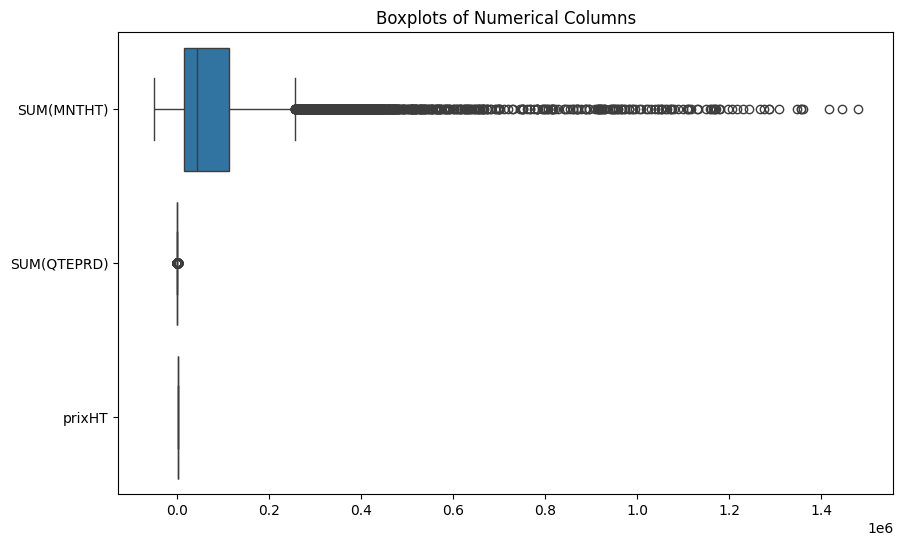

In [9]:
import seaborn as sns

# Select numerical columns
numerical_columns = dataset.select_dtypes(include=['float64']).columns

# Create a boxplot for all numerical columns on the same graph
plt.figure(figsize=(10, 6))  # Adjust size if needed
sns.boxplot(data=dataset[numerical_columns], orient='h')
plt.title('Boxplots of Numerical Columns')
plt.show()

This outliers can represent rare but important cases so we cannot remove them until further analysis and viz

### Data vizualisation

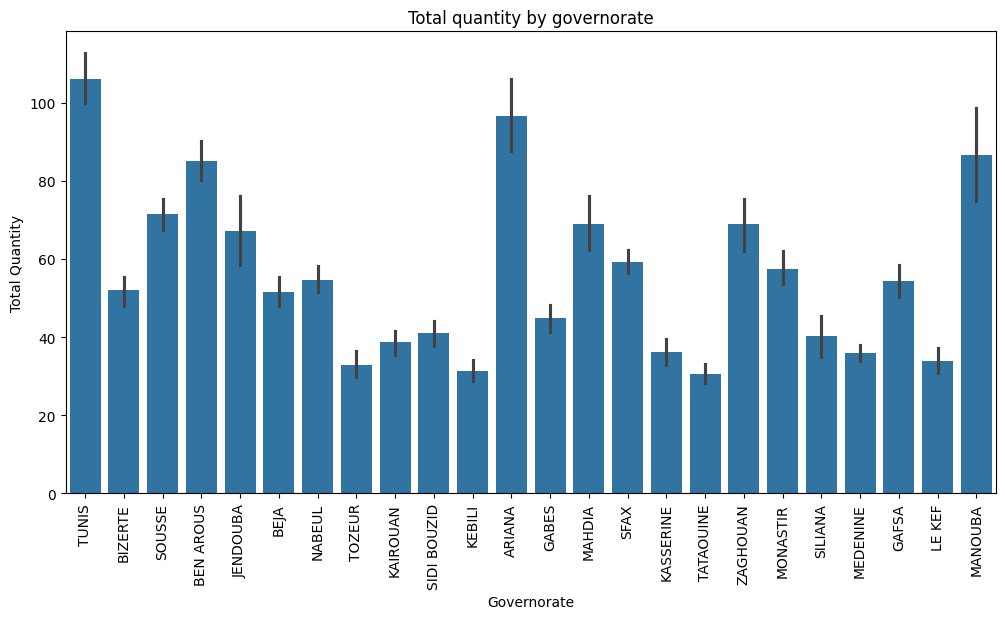

In [10]:
# Visualisation par gouvernorat
plt.figure(figsize=(12, 6))
sns.barplot(x='CODGVR', y='SUM(QTEPRD)', data=dataset)
plt.title('Total quantity by governorate')
plt.xlabel('Governorate')
plt.ylabel('Total Quantity')
plt.xticks(rotation=90)
plt.show()

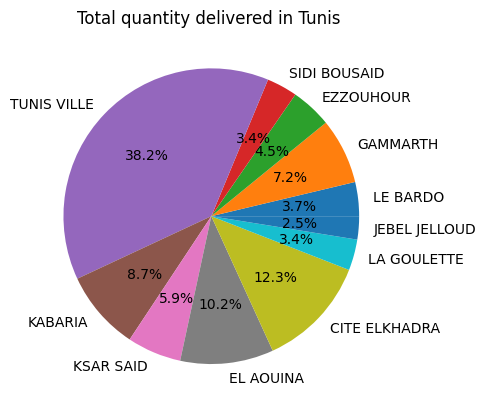

In [11]:
df_tunis = dataset[dataset["CODGVR"] == "TUNIS"]

quantites_par_region = {}

for region in df_tunis["CODLOC"].unique():
    df_region = df_tunis[df_tunis["CODLOC"] == region]

    quantite_totale = df_region["SUM(QTEPRD)"].sum()

    quantites_par_region[region] = quantite_totale

plt.pie(quantites_par_region.values(), labels=quantites_par_region.keys(), autopct="%1.1f%%")

plt.title("Total quantity delivered in Tunis ")

# Afficher le graphique
plt.show()

=> this reflect 

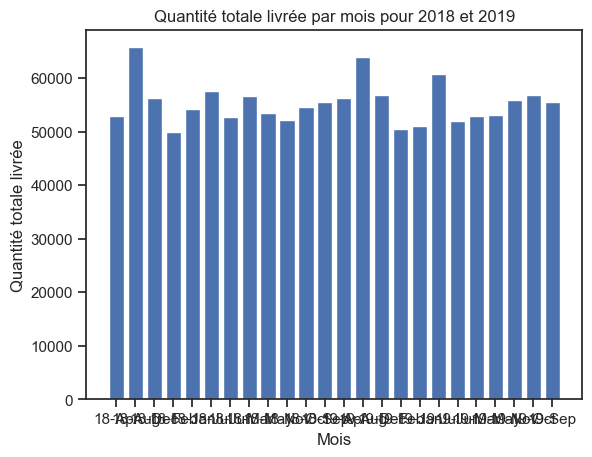

In [51]:
import matplotlib.pyplot as plt

# Calculer la somme de la quantité livrée par mois
df_somme_mensuelle = dataset.groupby(["MOIS"])["SUM(QTEPRD)"].sum()

# Créer un bar plot pour chaque mois
plt.bar(df_somme_mensuelle.index, df_somme_mensuelle)

# Définir les labels des axes
plt.xlabel("Mois")
plt.ylabel("Quantité totale livrée")

# Définir le titre du graphique
plt.title("Quantité totale livrée par mois pour 2018 et 2019")

# Afficher le graphique
plt.show()

In [ ]:
df_tunis = dataset[dataset["CODGVR"] == "TUNIS"]

quantites_par_region = {}

for region in df_tunis["CODLOC"].unique():
    df_region = df_tunis[df_tunis["CODLOC"] == region]

    quantite_totale = df_region["SUM(QTEPRD)"].sum()

    quantites_par_region[region] = quantite_totale

plt.pie(quantites_par_region.values(), labels=quantites_par_region.keys(), autopct="%1.1f%%")

plt.title("Total quantity delivered in Tunis ")

# Afficher le graphique
plt.show()

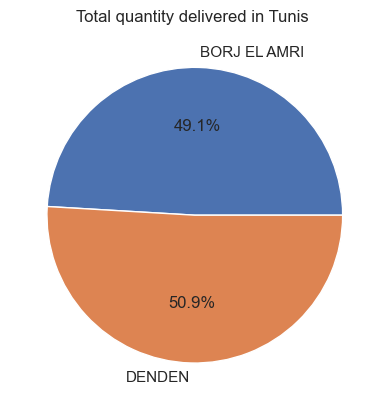

In [34]:
df_tunis = dataset[dataset["CODGVR"] == "MANOUBA"]

quantites_par_region = {}

for region in df_tunis["CODLOC"].unique():
    df_region = df_tunis[df_tunis["CODLOC"] == region]

    quantite_totale = df_region["SUM(QTEPRD)"].sum()

    quantites_par_region[region] = quantite_totale

plt.pie(quantites_par_region.values(), labels=quantites_par_region.keys(), autopct="%1.1f%%")

plt.title("Total quantity delivered in Tunis ")

# Afficher le graphique
plt.show()

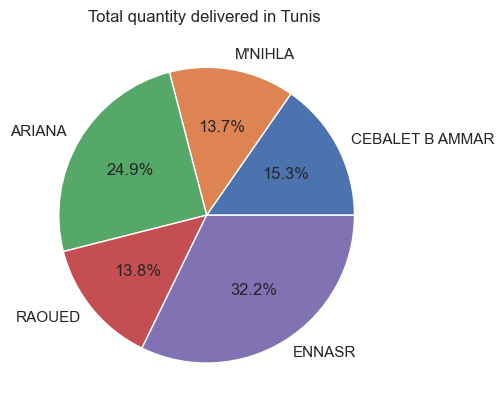

In [35]:
df_tunis = dataset[dataset["CODGVR"] == "ARIANA"]

quantites_par_region = {}

for region in df_tunis["CODLOC"].unique():
    df_region = df_tunis[df_tunis["CODLOC"] == region]

    quantite_totale = df_region["SUM(QTEPRD)"].sum()

    quantites_par_region[region] = quantite_totale

plt.pie(quantites_par_region.values(), labels=quantites_par_region.keys(), autopct="%1.1f%%")

plt.title("Total quantity delivered in Tunis ")

# Afficher le graphique
plt.show()